<a href="https://colab.research.google.com/github/Matheus-Homem/international_bank_marketing/blob/main/notebooks/c1_end_to_end_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Imports

## 0.1. Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 0.2. Helper Functions

In [31]:
def mirroring(x):
  x += (.5 - x)*2
  return x

## 0.3. Load Dataset

In [32]:
df = pd.read_csv('https://github.com/Matheus-Homem/international_bank_marketing/raw/main/data/CC%20GENERAL.csv')

In [33]:
df.sample().T

,3301
CUST_ID,C13395
BALANCE,926.219
BALANCE_FREQUENCY,1
PURCHASES,1218.92
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,1218.92
CASH_ADVANCE,0
PURCHASES_FREQUENCY,1
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,1


# 1. Data Description

In [34]:
df1 = df.copy()

## 1.1. Rename Columns

In [35]:
df1.columns = list(map(lambda x: x.lower(), df1.columns))

## 1.2. Data Dimensions

In [36]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 8950
Number of columns: 18


## 1.3. Data Types

In [37]:
df1.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

## 1.4. Check NA

In [38]:
df1.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

## 1.5. Replace NA

In [39]:
# remove NA
df1.dropna(inplace=True)
print('Number of rows: {}'.format(df1.shape[0]))
print('Removed data: {:.2f}%'.format(1-(df1.shape[0]/df.shape[0])))

Number of rows: 8636
Removed data: 0.04%


## 1.6. Change dtypes

## 1.7. Descriptive Statistics

# 2. Feature Engineering

In [40]:
df2 = df1.copy()

## 2.1. Feature Creation

In [41]:
df2.sample(5).T

,4526,7553,2032,8812,6109
cust_id,C14651,C17757,C12095,C19052,C16280
balance,1226.15,2017.39,1666.22,8.54964,746.979
balance_frequency,1,1,1,0.4,1
purchases,0,12024.4,720.48,0,2341.08
oneoff_purchases,0,11224.1,0,0,1953.84
installments_purchases,0,800.27,720.48,0,387.24
cash_advance,275.602,0,1143.15,56.3395,0
purchases_frequency,0,1,0.833333,0,1
oneoff_purchases_frequency,0,1,0,0,0.416667
purchases_installments_frequency,0,0.5,0.75,0,1


In [42]:
# data reference
df_ref = pd.DataFrame(df2['cust_id'])

# recency
df_ref['recency'] = df2['purchases_frequency']
df_ref['recency'] = df_ref['recency'].map(mirroring)

# frequency
df_ref['frequency'] = df2['purchases_trx']

# monetary
df_ref['monetary'] = df2['cash_advance']

# balance
df_ref['balance'] = df2['balance']

In [43]:
df_ref.sample().T

,8069
cust_id,C18287
recency,1
frequency,0
monetary,1098.29
balance,1001.44


# 3. Feature Filtering

In [44]:
df3 = df_ref.copy()

# 4. EDA (Exploratory Data Analysis)

In [45]:
df4 = df3.copy()

# 5. Data Preparation

In [46]:
df5 = df4.copy()

# 6. Feature Selection

In [47]:
df6 = df5.copy()

# 7. Hyperparameter Fine-Tunning

In [56]:
X = df6.drop('cust_id',axis=1)

In [60]:
clusters = [2,3,4,5,6]

## 7.1. Within-Cluster Sum of Square (WSS)

## 7.2. Sillhouette Score

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3df8eacb10>,
                 k=None, metric=None, model=None, timings=False)

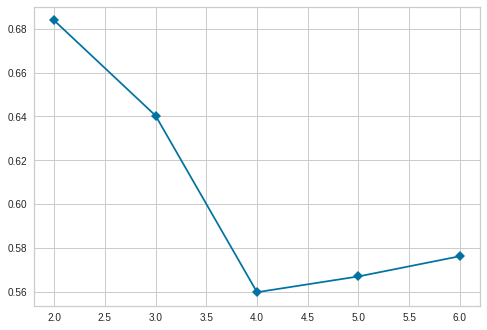

In [62]:
kmeans = KElbowVisualizer(KMeans(),k=clusters, metric='silhouette',timings=False)
kmeans.fit(X)

# 8. Model Training

# 9. Cluster Analysis